<a href="https://colab.research.google.com/github/Anuargharsh/Movie/blob/main/Makeover2MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#read in all the words
words = open('/content/names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [6]:
len(words)

32033

In [7]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [8]:
enumerate(chars)
print(list(enumerate(chars)))

[(0, 'a'), (1, 'b'), (2, 'c'), (3, 'd'), (4, 'e'), (5, 'f'), (6, 'g'), (7, 'h'), (8, 'i'), (9, 'j'), (10, 'k'), (11, 'l'), (12, 'm'), (13, 'n'), (14, 'o'), (15, 'p'), (16, 'q'), (17, 'r'), (18, 's'), (19, 't'), (20, 'u'), (21, 'v'), (22, 'w'), (23, 'x'), (24, 'y'), (25, 'z')]


In [9]:
print(stoi.items())
print(list(stoi.items()))

dict_items([('a', 1), ('b', 2), ('c', 3), ('d', 4), ('e', 5), ('f', 6), ('g', 7), ('h', 8), ('i', 9), ('j', 10), ('k', 11), ('l', 12), ('m', 13), ('n', 14), ('o', 15), ('p', 16), ('q', 17), ('r', 18), ('s', 19), ('t', 20), ('u', 21), ('v', 22), ('w', 23), ('x', 24), ('y', 25), ('z', 26), ('.', 0)])
[('a', 1), ('b', 2), ('c', 3), ('d', 4), ('e', 5), ('f', 6), ('g', 7), ('h', 8), ('i', 9), ('j', 10), ('k', 11), ('l', 12), ('m', 13), ('n', 14), ('o', 15), ('p', 16), ('q', 17), ('r', 18), ('s', 19), ('t', 20), ('u', 21), ('v', 22), ('w', 23), ('x', 24), ('y', 25), ('z', 26), ('.', 0)]


In [198]:
#build the vocabulary of characters and mapping
def build_dataset(words):
  block_size = 3#context length: how many characters do we take to predict the next one?
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '---->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev,Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [12]:
C = torch.randn((27,2))

In [14]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [15]:
w1 = torch.randn((6,100))
b1 = torch.randn(100)

In [16]:
h = torch.tanh(emb.view(-1,6) @ w1 + b1)

In [17]:
h

tensor([[ 0.9677,  0.9995,  0.1902,  ..., -0.3651, -0.9813,  0.5331],
        [ 0.4995,  1.0000, -1.0000,  ...,  0.9869, -0.7319, -0.7089],
        [ 0.7214,  0.9979, -0.9986,  ...,  0.6392, -0.9603, -0.9027],
        ...,
        [ 0.9898,  0.4537,  0.9998,  ..., -0.9891, -0.9999,  0.2641],
        [ 0.2373,  0.9999, -0.9887,  ..., -0.9818, -0.9195,  0.7266],
        [ 0.2815,  0.9997, -1.0000,  ...,  0.9999,  0.7174, -0.3400]])

In [18]:
h.shape

torch.Size([228146, 100])

In [19]:
w2 = torch.randn((100,27))
b2 = torch.randn(27)

In [20]:
logits = h @ w2 + b2

In [21]:
logits.shape

torch.Size([228146, 27])

In [22]:
logits

tensor([[ -1.0218,  -5.1498,  -8.5883,  ...,  -5.2488,   3.7050,  -0.2296],
        [-16.3564,  -6.4466,  -8.0762,  ...,  -5.8641,   6.7334, -13.9488],
        [-14.7605, -11.4538,   4.3866,  ...,   3.9753,  -2.3972,  -9.9442],
        ...,
        [  5.5180,  -1.2136,   1.5202,  ...,   0.8538,  -9.9259,   7.9674],
        [ -6.0128,  -3.1433, -14.9974,  ...,   5.9745,   4.2094,  -3.8006],
        [ -7.1939,  -3.3020,   1.5332,  ..., -10.0893,  -1.7885, -10.8290]])

In [23]:
counts = logits.exp()

In [24]:
prob = counts / counts.sum(1, keepdims = True)

In [25]:
prob.shape

torch.Size([228146, 27])

#Now made respectable


In [139]:
Xtr.shape, Ytr.shape #dataset for training

(torch.Size([182625, 3]), torch.Size([182625]))

In [177]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,10), generator = g)
W1 = torch.randn((30,200), generator = g)
b1 = torch.randn((200), generator = g)
W2 = torch.randn((200,27), generator = g)
b2 = torch.randn((27), generator = g)
parameters = [C,W1,b1,W2,b2]

In [178]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [179]:
for p in parameters:
  p.requires_grad = True

In [180]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre


In [181]:
lri = []
lossi = []
stepi = []


In [194]:

for i in range(200000):

  # Minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forwared pass
  emb = C[Xtr[ix]] #(32,3,2)
  h = torch.tanh(emb.view(-1,30) @ W1 + b1) #(32,100)
  logits = h @ W2 + b2 #(32,27)
  loss = F.cross_entropy(logits,Ytr[ix])
  #print(loss.item())
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  #update
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

    #track Status
    # lri.append(lre[i])
    lossi.append(loss.log10().item())
    stepi.append(i)


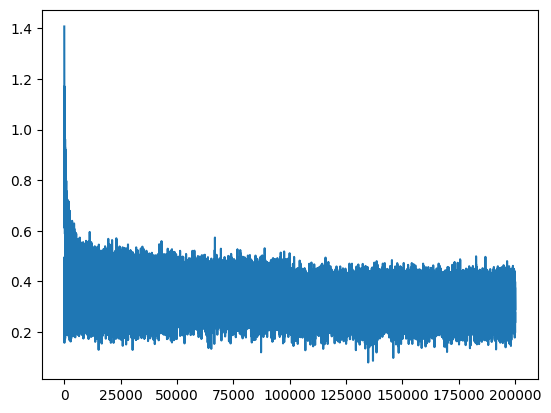

In [195]:
plt.plot(stepi,lossi)

In [196]:
emb = C[Xtr] #(32,3,2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) #(32,100)
logits = h @ W2 + b2 #(32,27)
loss = F.cross_entropy(logits,Ytr)
loss

tensor(2.0940, grad_fn=<NllLossBackward0>)

In [197]:
emb = C[Xdev] #(32,3,2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) #(32,100)
logits = h @ W2 + b2 #(32,27)
loss = F.cross_entropy(logits,Ydev)
loss

tensor(2.1492, grad_fn=<NllLossBackward0>)

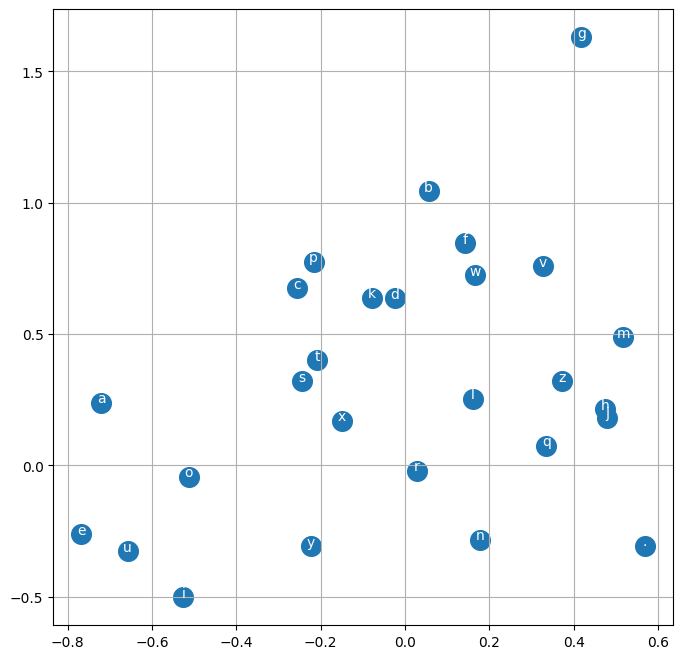

In [160]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s = 200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", color="white")
plt.grid('minor')

In [202]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)
block_size = 3
for i in range(20):

  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor([context])] # initialize with all ...
    h = torch.tanh(emb.view(1,-1) @ W1 + b1)
    logits = h @ W2 + b2
    prob = F.softmax(logits, dim = 1)
    ix = torch.multinomial(prob, num_samples=1, generator = g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  print(''.join(itos[i] for i in out))



mora.
kmyah.
keel.
nihayla.
renyra.
endraege.
dejadielin.
shi.
jen.
edecieson.
artemy.
korvaan.
nosalbergian.
jest.
jairenlynn.
novana.
uba.
ted.
ryyah.
fael.
